In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import generator as gen
from src.estimators import SNNEstimator, RidgeEstimator
from src.general_snn import general_snn
from src import anchor_matrix as am

In [2]:
def print_analytics(RMSEs, MAEs, rating_matrix, Y_restored):
  print(f"RMSE: {np.mean(RMSEs):.4f}±{np.sqrt(np.var(RMSEs)):.3f}")
  print(f"MAE: {np.mean(MAEs):.4f}±{np.sqrt(np.var(MAEs)):.3f}")
  # distribution of true vs restored samples:
  plt.hist(rating_matrix.flatten(), bins=100, alpha=0.3, label="true ratings")
  plt.hist(Y_restored.flatten(), bins=100, color='C0', alpha=0.7, label="restored ratings")
  plt.xlabel('ratings')
  plt.ylabel('frequency')
  plt.grid(alpha=0.5)
  plt.legend()
  plt.legend(loc="upper right");

In [3]:
def run_test(rating_matrix, P, biclique_search, estimator, num_estimates=1, num_runs=1):
    RMSEs = []
    MAEs = []
    for _ in range(num_runs):
        D = np.random.binomial(1, P)
        Y = rating_matrix.copy()
        Y[D == 0] = np.nan
        Y_restored = general_snn(
          D, Y,
          biclique_search=biclique_search,
          estimator=estimator,
          num_estimates=num_estimates,
          min_val=1, max_val=5,
          print_progress=True
        )
        Error = (rating_matrix - Y_restored).flatten()
        RMSEs.append(np.sqrt(np.mean(Error ** 2)))
        MAEs.append(np.mean(np.abs(Error)))

    print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)

In [4]:
inv_scale=1

rating_matrix, P = gen.getRatingAndPropensityMatrix(inv_scale=inv_scale)

### 1.1 Baseline: Best Submatrix, SNN unmodified

 79/80
RMSE: 0.3983±0.000
MAE: 0.2249±0.000


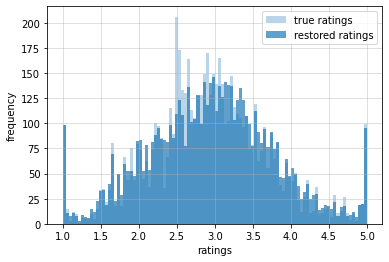

In [5]:
run_test(
  rating_matrix, P,
  biclique_search=am.biclique_find,
  estimator=SNNEstimator(),
  num_estimates=1,
  num_runs=1,
)

### 1.2 Baseline-opt: Best Submatrix, SNN with better params

 79/80
RMSE: 0.2023±0.000
MAE: 0.0925±0.000


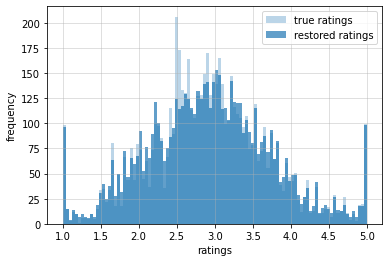

In [6]:
run_test(
  rating_matrix, P,
  biclique_search=am.biclique_find,
  estimator=SNNEstimator(spectral_rank_fun=lambda s, m, n: 5),
  num_estimates=1,
  num_runs=1,
)

## 2. Randomized solutions

### 2.1 Randomized + SNN

 79/80
RMSE: 0.2261±0.000
MAE: 0.1158±0.000


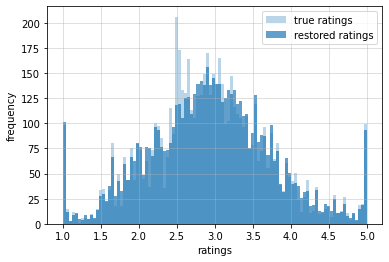

In [8]:
run_test(
  rating_matrix, P,
  biclique_search=am.biclique_random,
  estimator=SNNEstimator(spectral_rank_fun=lambda s, m, n: 4),
  num_estimates=5,
  num_runs=1,
)

### 2.2 Randomized + Ridge

 79/80
RMSE: 0.1284±0.000
MAE: 0.0613±0.000


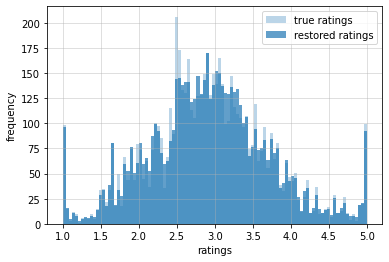

In [9]:
run_test(
  rating_matrix, P,
  biclique_search=am.biclique_random,
  estimator=RidgeEstimator(),
  num_estimates=5,
  num_runs=1,
)